<a href="https://colab.research.google.com/github/jeromtom/KerasCV-HAR/blob/main/EatNot_HAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'human-action-recognition-har-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2232355%2F3733921%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240217%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240217T155858Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D86dc293e71f4cac41f66d15d7bd7c57cca5fa768fdc952ed1007655201fca38c912e61b114d274b641ac20503325eb394d4aa9eb2d79f887a9a74826a880bf88d3f632d7a5b4d8e572c0c49077ee2da7c3557298446f23db3f7fd73f3804b62a86abba98286c26a39e5f67a87b0dc8b108ab494b88ffd68879f32b092a2354f1f37572050d7fcf1981f339682cf19acb4774f626506106868f8867b71f227454d853f8443bf5b41ed8c6d66de85950e5f2881f86cf0326819a8b1e92658c8f91037db10a82fbcf9a099b9cddf0b163efa1356cb4358c00796479ea6cad993dc1ec4a8ce244f36340afee244eb5427f1e64896cbcd624fc3ca7506efa79bbaa43'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 311184368 bytes downloaded
Downloaded and uncompressed: human-action-recognition-har-dataset
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train/Image_1420.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train/Image_9194.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train/Image_6453.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train/Image_142.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train/Image_4155.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train/Image_12002.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train/Image_4248.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train/Image_6090.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train/Image_2307.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/

# 1| what is HAR
* Human activity recognition, or HAR for short, is a broad field of study concerned with identifying the specific movement or action of a person based on sensor data.
* Movements are often typical activities performed indoors, such as walking, talking, standing, and sitting


# Why it is important ?
* Human activity recognition plays a significant role in human-to-human interaction and interpersonal relations.
* Because it provides information about the identity of a person, their personality, and psychological state, it is difficult to extract.
* The human ability to recognize another person’s activities is one of the main subjects of study of the scientific areas of computer vision and machine learning. As a result of this research, many applications, including video surveillance systems, human-computer interaction, and robotics for human behavior characterization, require a multiple activity recognition system.

# 2| Importing libraries

In [3]:
import os
import glob
import random
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

# 3| Getting the path and Loading the data

In [4]:
train_data = pd.read_csv("../input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv")
test_data = pd.read_csv("../input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv")

In [5]:
train_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/train/*")
test_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/test/*")

In [6]:
train_data

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [7]:
train_data.label.value_counts()

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [8]:
import plotly.express as px
HAR = train_data.label.value_counts()
fig = px.pie(train_data, values=HAR.values, names=HAR.index, title='Distribution of Human Activity')
fig.show()

In [9]:
filename = train_data['filename']

situation = train_data['label']

In [10]:
filename

0            Image_1.jpg
1            Image_2.jpg
2            Image_3.jpg
3            Image_4.jpg
4            Image_5.jpg
              ...       
12595    Image_12596.jpg
12596    Image_12597.jpg
12597    Image_12598.jpg
12598    Image_12599.jpg
12599    Image_12600.jpg
Name: filename, Length: 12600, dtype: object

# 4| Making function that take random path and display the image

In [11]:
def displaying_random_images():
    num = random.randint(1,10000)
    imgg = "Image_{}.jpg".format(num)
    train = "../input/human-action-recognition-har-dataset/Human Action Recognition/train/"
    if os.path.exists(train+imgg):
        testImage = img.imread(train+imgg)
        plt.imshow(testImage)
        plt.title("{}".format(train_data.loc[train_data['filename'] == "{}".format(imgg), 'label'].item()))

    else:
        #print(train+img)
        print("File Path not found \nSkipping the file!!")

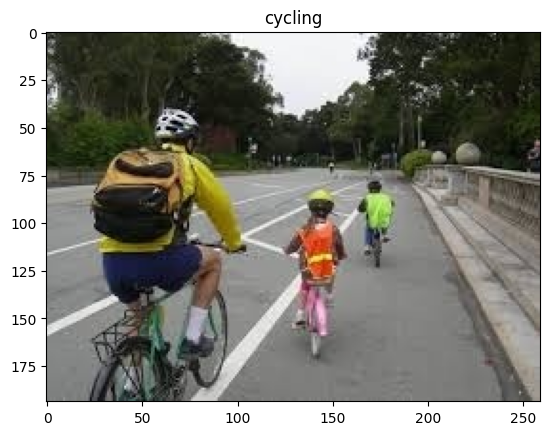

In [12]:
displaying_random_images()

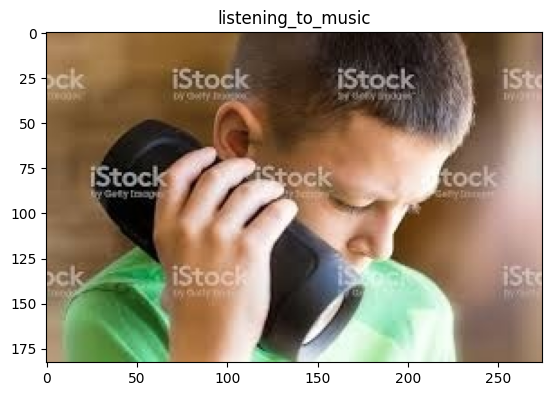

In [13]:
displaying_random_images()

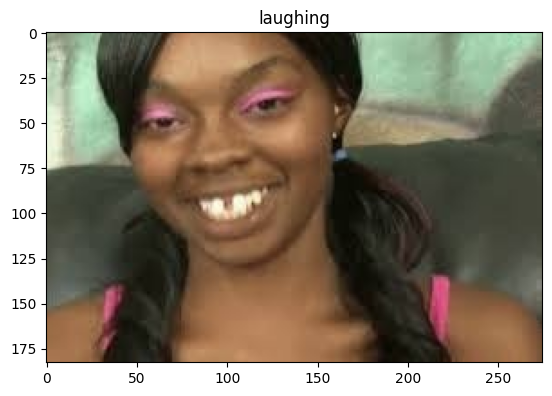

In [14]:
displaying_random_images()

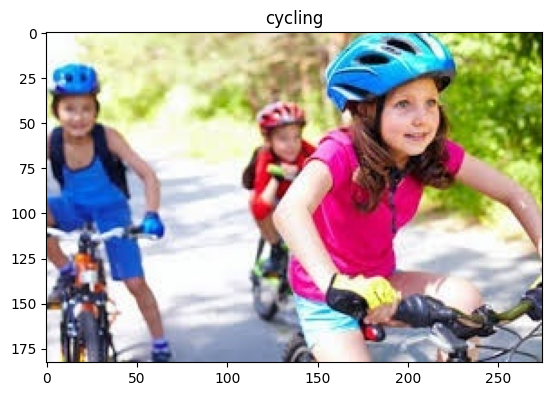

In [15]:
displaying_random_images()

# 5| Data preprocessing

In [16]:
img_data = []
img_label = []
length = len(train_fol)
for i in (range(len(train_fol)-1)):
    t = '../input/human-action-recognition-har-dataset/Human Action Recognition/train/' + filename[i]
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])

In [17]:
img_shape= (160,160,3)

In [18]:
iii = img_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [19]:
y_train = to_categorical(np.asarray(train_data["label"].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 6| Make an CNN model

In [20]:
efficientnet_model = Sequential()

model = tf.keras.applications.EfficientNetB7(include_top=False,
                                            input_shape=(160,160,3),
                                            pooling ="avg",classes=15,
                                             weights="imagenet")

for layer in model.layers:
    layer.trainable=False


efficientnet_model.add(model)
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(512,activation="relu"))
efficientnet_model.add(Dense(15,activation="softmax"))

258076736/258076736 [==============================] - 3s 0us/step


In [21]:
efficientnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [22]:
efficientnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional  (None, 2560)              64097687  
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 512)               1311232   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 65416614 (249.54 MB)
Trainable params: 1318927 (5.03 MB)
Non-trainable params: 64097687 (244.51 MB)
_________________________________________________________________


In [23]:
history = efficientnet_model.fit(iii,y_train,epochs=40)

Epoch 1/40
394/394 [==============================] - 98s 183ms/step - loss: 1.2658 - accuracy: 0.5994
Epoch 2/40
394/394 [==============================] - 75s 191ms/step - loss: 0.8728 - accuracy: 0.7166
Epoch 3/40
394/394 [==============================] - 75s 191ms/step - loss: 0.6636 - accuracy: 0.7856
Epoch 4/40
394/394 [==============================] - 75s 191ms/step - loss: 0.4697 - accuracy: 0.8513
Epoch 5/40
394/394 [==============================] - 75s 191ms/step - loss: 0.3378 - accuracy: 0.8884
Epoch 6/40
394/394 [==============================] - 77s 195ms/step - loss: 0.2396 - accuracy: 0.9249
Epoch 7/40
394/394 [==============================] - 76s 192ms/step - loss: 0.1708 - accuracy: 0.9505
Epoch 8/40
394/394 [==============================] - 75s 191ms/step - loss: 0.1402 - accuracy: 0.9575
Epoch 9/40
394/394 [==============================] - 75s 191ms/step - loss: 0.1188 - accuracy: 0.9637
Epoch 10/40
394/394 [==============================] - 75s 191ms/step - l

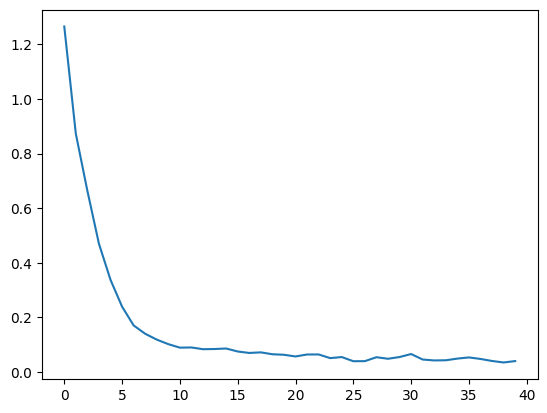

In [24]:
losses = history.history["loss"]
plt.plot(losses)

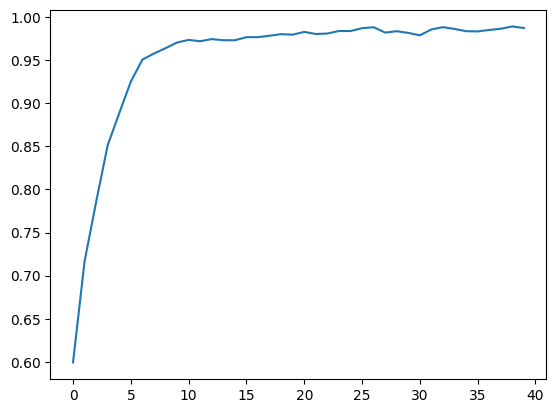

In [25]:
acc = history.history['accuracy']
plt.plot(acc)

# 7| Model predictions

In [40]:
import PIL.Image
def read_img(fn):
    img = PIL.Image.open(fn)
    return np.asarray(img.resize((160,160)))

In [47]:
def test_predict(test_image):
    result = efficientnet_model.predict(np.asarray([read_img(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    probability = str(np.max(result)*100)
    print("probability: ", probability + "%\nPredicted class : ", prediction)

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

    return(prediction, probability)

1/1 [==============================] - 19s 19s/step
probability: 99.99760389328003%
Predicted class :  1


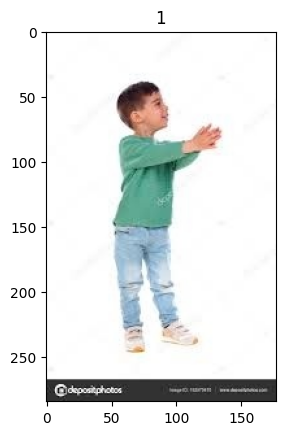

In [28]:
test_predict("/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_1001.jpg")

1/1 [==============================] - 0s 46ms/step
probability: 85.5114221572876%
Predicted class :  4


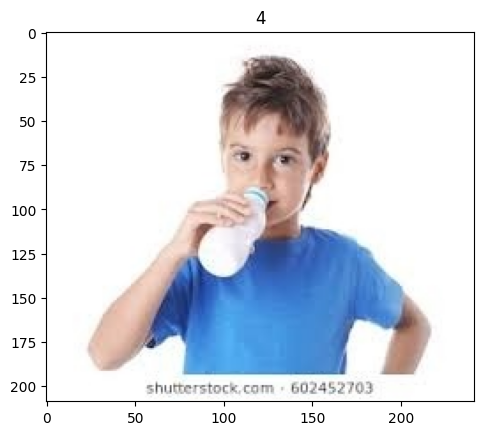

In [29]:
test_predict("/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_101.jpg")

1/1 [==============================] - 0s 45ms/step
probability: 58.63649845123291%
Predicted class :  11


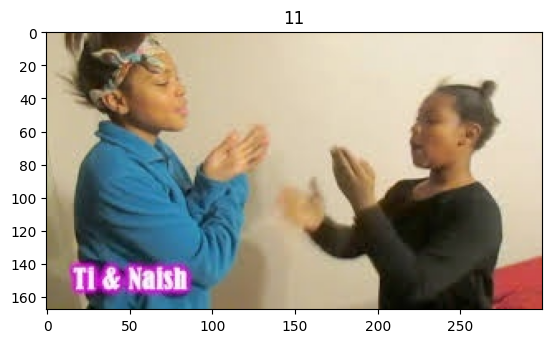

In [30]:
test_predict("/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_1056.jpg")

1/1 [==============================] - 0s 74ms/step
probability: 99.96541738510132%
Predicted class :  14


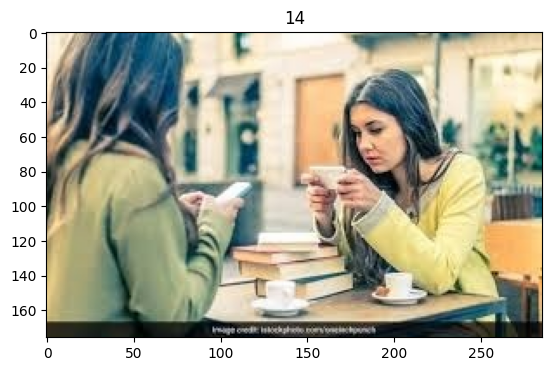

In [31]:
test_predict("/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_1024.jpg")

In [32]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


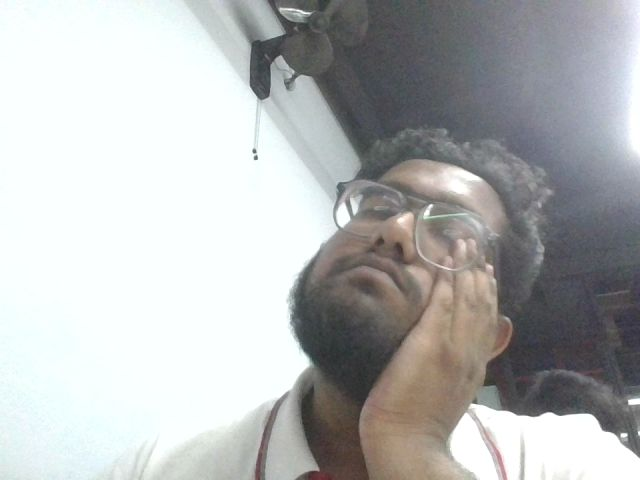

1/1 [==============================] - 0s 61ms/step
probability: 57.60969519615173%
Predicted class :  12


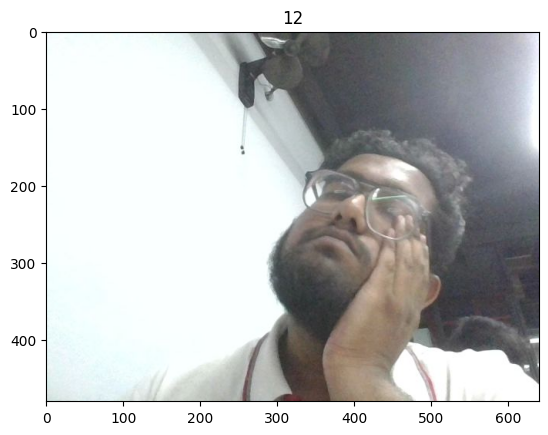

In [44]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
  test_predict(filename)

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

'calling', ’clapping’, ’cycling’, ’dancing’, ‘drinking’, ‘eating’, ‘fighting’, ‘hugging’, ‘laughing’, ‘listening_to_music’, ‘running’, ‘sitting’, ‘sleeping’, texting’, ‘using_laptop’

1/1 [==============================] - 0s 84ms/step
probability:  57.60969519615173%
Predicted class :  12


(12, '57.60969519615173')

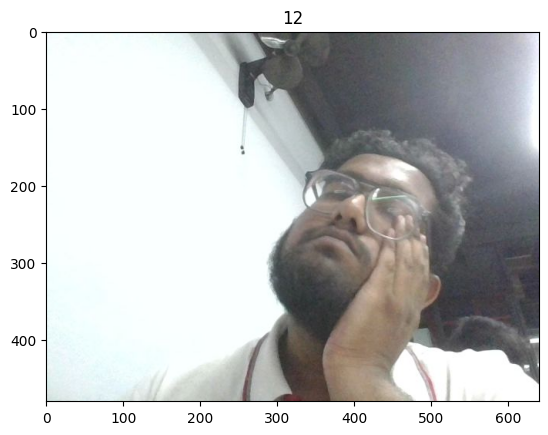

In [48]:
test_predict("/content/photo.jpg")

In [ ]:
def isEating(test_image):
    result = efficientnet_model.predict(np.asarray([read_img(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    probability = str(np.max(result)*100)
    print("probability: ", probability + "%\nPredicted class : ", prediction)

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

    if (prediction ==5 and probability >70):
      return ("Yes, go to the pantry dear")
    else if (prediction ==5 and probability >30):
      return ("Are you eating? If yes, please go to pantry")



In [ ]:
isEating("/content/photo.png")